In [ ]:
# Cluster code to genererate data 
# using LMC
# include("julia_exec.jl")
# pids_int = slurm_4_interpolations()
# pids_pd = slurm_phasediagrams(pids_int)
# [postprocessing(pid) for pid in pids_pd]
# rsync -avz ferpe@atlas-fdr-login-01.sw.ehu.es:/dipc/ferpe/Projects/LMC /Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA

In [1]:
using Pkg
Pkg.activate(dirname(dirname(pwd())))   # activate MyPackage
# Pkg.instantiate()
using Revise
using LMC
using CairoMakie

  Activating project at `~/Documents/Work/PostdocDonosti/Packages/LMC`


Loaded plotting extension


In [6]:
pdPIDlist = [3281721, 3282325, 3246800, 3284349, 3238850] 
pdPID = pdPIDlist[5]

pdpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(pdPID)_merged_data.jld"
pdpresetpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(pdPID)_merged_presets.jld"

"/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/3238850_merged_presets.jld"

dim1: 500
dim2: 501
nalphas[1]: (501,)


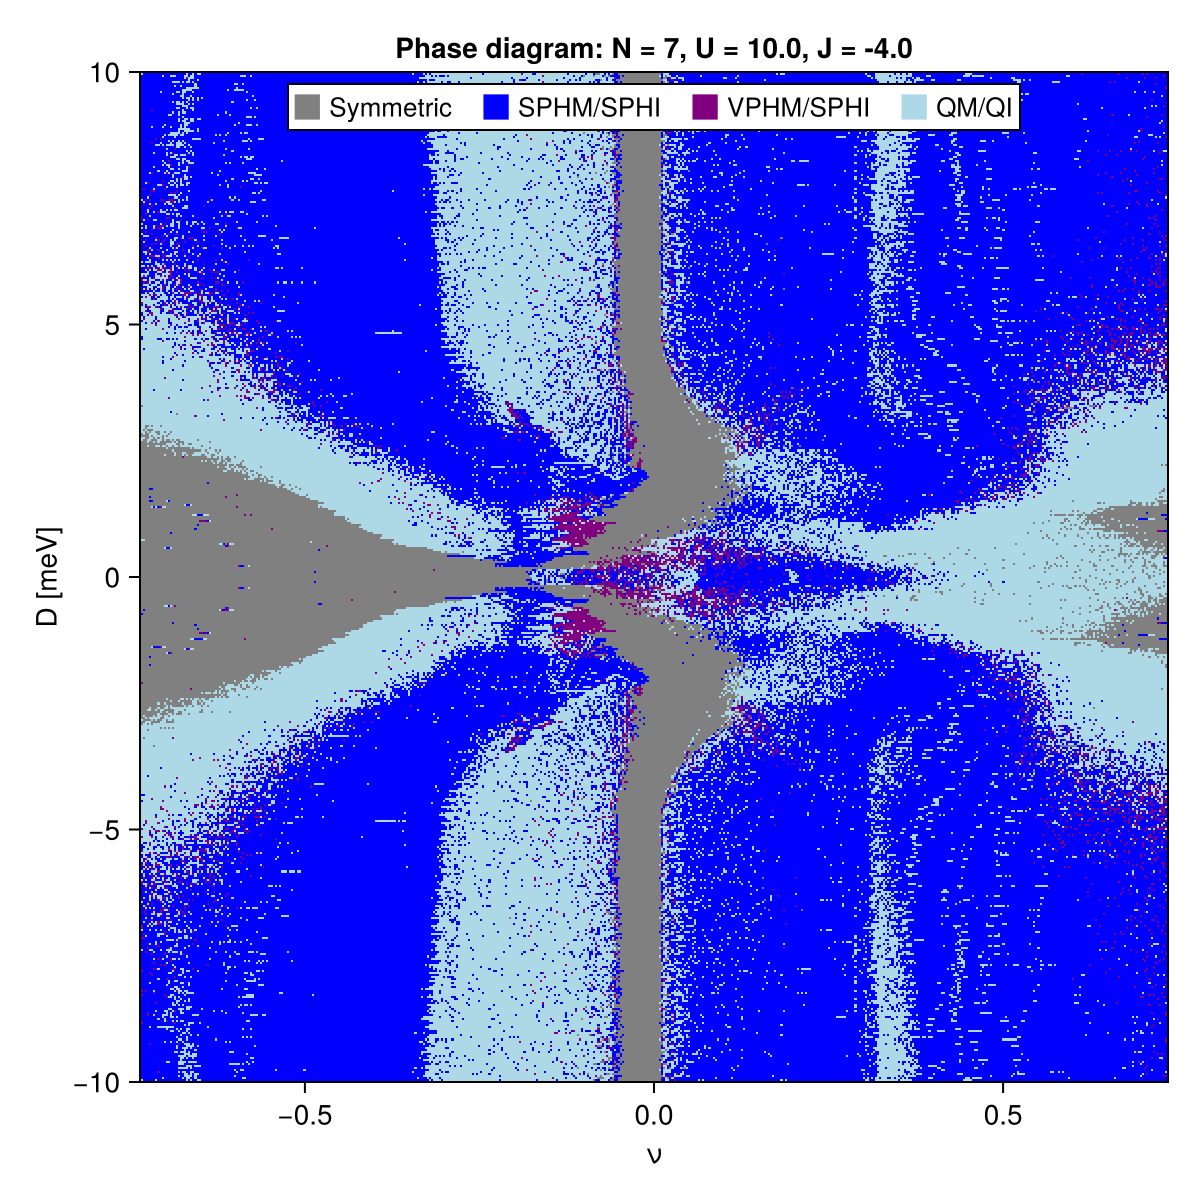

In [7]:
fig = plot_phasediagrams(pdpath, pdpresetpath)

In [3]:
function lat_figure_pd(pdPIDlist, pdPID; fontsizetheme = 15)
    with_theme(merge(theme_latexfonts(), Theme(fontsize = fontsizetheme))) do #
       figure_phase_diagrams(pdPIDlist, pdPID; fontsize = fontsizetheme)    
    end
end

function figure_phase_diagrams(pdPIDlist,pdPID; fontsize = 14)
    fig = Figure(size = (1200, 300))
    colorlist = [:purple, :gray, :blue, :lightblue]
    letters = ["a)","b)","c)","d)","e)"]
    axes = [Axis(fig[2,i], xlabel = L"$\nu\text{ [}10^{12}\text{ cm}^{-2}\text{]}$", ylabel = L"$E_z \text{ [meV]}$",  ylabelsize = fontsize +2, xlabelsize = fontsize +2, title = letters[i], titlesize = fontsize)  for i in 1:length(pdPIDlist)]
    for i in 1:length(pdPIDlist)
        pdpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(pdPIDlist[i])_merged_data.jld"
        pdpresetpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(pdPIDlist[i])_merged_presets.jld"
        plot_phasediagrams(axes[i], pdpath, pdpresetpath, colorlist = colorlist)
    end

    markers = [ MarkerElement(color = colorlist[2],   marker = :rect, markersize = 12),
                MarkerElement(color = colorlist[4],   marker = :rect, markersize = 12), 
                MarkerElement(color = colorlist[3],   marker = :rect, markersize = 12) ,
                MarkerElement(color = colorlist[1],   marker = :rect, markersize = 12)]
    
    labels = ["Symmetric",
            "QM/3QM",
            "SPHM/SPHI",
            "VPHM/VPHI"]

    Legend(
        fig[1, 1:length(pdPIDlist)],
        markers,
        labels,
        orientation = :horizontal,
        framevisible = true,
        framesize = 0.5,
        fontsize = fontsize,
        framecolor = :black,
        padding = (4, 4, 1, 1),
        patchsize = (18, 18),
        colgap = 1,
        rowgap = -100,
        tellwidth = false
    )
    rowgap!(fig.layout, -0)

    elem_1 = [MarkerElement(color = :blue, marker = 'x', markersize = 0,
            strokecolor = :black)]

    [axislegend(axes[i],
        [elem_1],
        ["N = $(i+2)"],
        patchsize = (35, 35), fontsize = fontsize, offset = (10, 20), padding = (-35,6,-7,-7), position = :ct, backgroundcolor = RGBAf(1, 1, 1, 0.8)) for i in 1:length(pdPIDlist)]


    # text!(axes[1], "a)", position = (-0.1, 8), fontsize = fontsize -2, color = :white)
    # text!(axes[2], "b)", position = (-0.15, 8), fontsize = fontsize -2, color = :white)
    # text!(axes[3], "c)", position = (-0.22, 8), fontsize = fontsize -2, color = :gray)

    # text!(axes[4], "d)", position = (-0.24, 8), fontsize = fontsize -2, color = :black)
    # text!(axes[5], "e)", position = (-0.24, 8), fontsize = fontsize -2, color = :black)

    hideydecorations!(axes[2], grid = false)
    hideydecorations!(axes[3], grid = false)
    hideydecorations!(axes[4], grid = false)
    hideydecorations!(axes[5], grid = false)
    fig
end


figure_phase_diagrams (generic function with 1 method)

dim1: 500
dim2: 501
nalphas[1]: (501,)
dim1: 500
dim2: 500
nalphas[1]: (500,)
dim1: 500
dim2: 501
nalphas[1]: (501,)
dim1: 500
dim2: 500
nalphas[1]: (500,)
dim1: 500
dim2: 501
nalphas[1]: (501,)


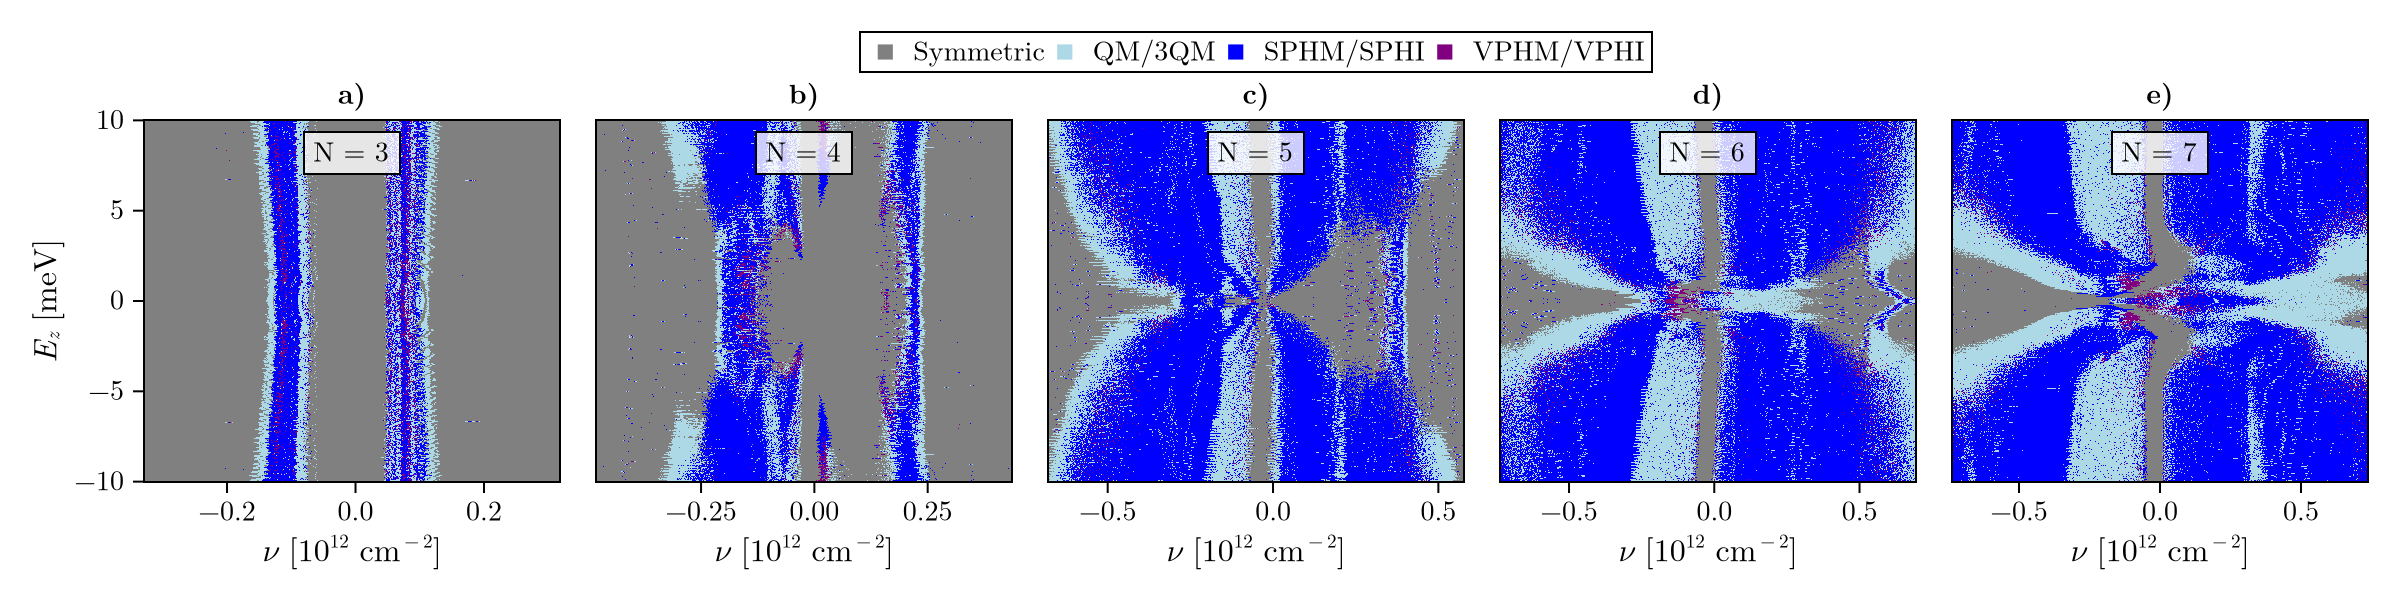

In [4]:
fig_pd = lat_figure_pd(pdPIDlist, pdPID, fontsizetheme = 14)

In [5]:
v = "v1"
save("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figures/FigurePD$(v).pdf", fig_pd)

CairoMakie.Screen{PDF}
